In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import pickle

In [20]:
# jobs = pd.read_csv('jobs.tsv', sep='\t', error_bad_lines=False)
# jobs.head()

In [21]:
# jobs.iloc[0]['Description']

In [22]:
# jobs = jobs.dropna()
# len(jobs)

### Removing html elements from Description and Requirements

In [23]:
# removePattern = r'(<(.*?)>)|(&\w+)'
# addSpacePattern = r'([;:])|(\\r)|(\\n)'
# removeExtraSpaces = r'(\s\s+?)(?=\S)'
# jobs['DescCleaned'] = jobs['Description'].str.lower()
# jobs['DescCleaned'] = jobs['DescCleaned'].str.replace(removePattern, "")
# jobs['DescCleaned'] = jobs['DescCleaned'].str.replace(addSpacePattern, " ")
# jobs['DescCleaned'] = jobs['DescCleaned'].str.replace(removeExtraSpaces, " ")
# # Same for Requirements
# jobs['ReqCleaned'] = jobs['Requirements'].str.lower()
# jobs['ReqCleaned'] = jobs['ReqCleaned'].str.replace(removePattern, "")
# jobs['ReqCleaned'] = jobs['ReqCleaned'].str.replace(addSpacePattern, " ")
# jobs['ReqCleaned'] = jobs['ReqCleaned'].str.replace(removeExtraSpaces, " ")
# jobs.head()

In [24]:
# ## Formatting jobs dataframe keeping only good information
# new_jobs = pd.DataFrame(jobs['Title'])
# new_jobs['Requirement'] = jobs['ReqCleaned']
# new_jobs['Description'] = jobs['DescCleaned']
# new_jobs

In [17]:
# new_jobs.to_pickle('jobs_good.pkl')

## Loading Cleaned Data

In [18]:
jobs = pd.read_pickle('jobs_good.pkl')

In [19]:
jobs.head()

,Title,Requirement,Description
0,Security Engineer/Technical Lead,skill set network security tools webdefend web...,security clearance required top secret job num...
1,SAP Business Analyst / WM,what you need four year college degree minimum...,no corp. to corp resumes are being considered ...
2,P/T HUMAN RESOURCES ASSISTANT,please refer to the job description to view th...,p/t human resources assistant —— 1-2 years ex...
5,SALON/SPA COORDINATOR,please refer to the job description to view th...,— salon/spa coordinator — daytona college in ...
6,SUPERINTENDENT,please refer to the job description to view th...,superintendent —— central florida general con...


In [6]:
# import re
# CLEANR = re.compile('<.*?>') 

# def cleanhtml(raw_html):
#     cleantext = re.sub(CLEANR, '', raw_html)
#     return cleantext

In [7]:
# description = list(jobs['Description'])
# req = list(jobs['Requirements'])

# for i in range(len(jobs)):
#     to_remove = ['\\r', '&nbsp', ';']
#     description[i] = cleanhtml(description[i])
#     req[i] = cleanhtml(req[i])
#     for j in to_remove:
#         description[i] = description[i].replace(j, '')
#         req[i] = req[i].replace(j, '')
    
# jobs['Description'] = description
# jobs['Requirements'] = req
# jobs.head()

In [25]:
jobs.iloc[0]['Description']

'security clearance required top secret job number tmr-447 location of job washington, dc tmr, inc. is an equal employment opportunity company for more job opportunities with tmr, visit our website www.tmrhq.com send resumes to hr@tmrhq2.com job summary leads the customer s overall cyber security strategy, formalizes service offerings consisted with itil best practices, and provides design and architecture support. provide security design / architecture support for ojp s it security division (itsd) leads the secops team in the day to day ojp security operations support provides direction when needed in a security incident or technical issues works in concert with network operations on design /integration for best security posture supports business development functions including capture management, proposal development and responses, and other initiatives to include conferences, trade shows, webinars, developing white papers and the like. identifies resources and mentors in-house talen

In [9]:
tmp_s = set(jobs['Title'])
len(tmp_s), len(jobs)

(294106, 658835)

In [9]:
users = pd.read_csv('users.tsv', sep='\t')
users.head()

,UserID,WindowID,Split,City,State,Country,ZipCode,DegreeType,Major,GraduationDate,WorkHistoryCount,TotalYearsExperience,CurrentlyEmployed,ManagedOthers,ManagedHowMany
0,47,1,Train,Paramount,CA,US,90723,High School,NaN,1999-06-01 00:00:00,3,10.0,Yes,No,0
1,72,1,Train,La Mesa,CA,US,91941,Master's,Anthropology,2011-01-01 00:00:00,10,8.0,Yes,No,0
2,80,1,Train,Williamstown,NJ,US,08094,High School,Not Applicable,1985-06-01 00:00:00,5,11.0,Yes,Yes,5
3,98,1,Train,Astoria,NY,US,11105,Master's,Journalism,2007-05-01 00:00:00,3,3.0,Yes,No,0
4,123,1,Train,Baton Rouge,LA,US,70808,Bachelor's,Agricultural Business,2011-05-01 00:00:00,1,9.0,Yes,No,0


In [10]:
user_history = pd.read_csv('user_history.tsv', sep='\t', error_bad_lines=False)
user_history.head()

,UserID,WindowID,Split,Sequence,JobTitle
0,47,1,Train,1,National Space Communication Programs-Special ...
1,47,1,Train,2,Detention Officer
2,47,1,Train,3,"Passenger Screener, TSA"
3,72,1,Train,1,"Lecturer, Department of Anthropology"
4,72,1,Train,2,Student Assistant


In [7]:
user_history['UserID'].value_counts()

661257     120
1089978     42
359211      38
149326      27
850155      23
          ... 
329077       1
462438       1
78076        1
839177       1
81208        1
Name: UserID, Length: 375531, dtype: int64

In [26]:
size = 10000

In [28]:
from sklearn.model_selection import train_test_split

description = np.array(jobs['Description'])[:size]
requirements = np.array(jobs['Requirement'])[:size]
title = np.array(jobs['Title'])[:size]

# Training model using description only

In [30]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [31]:
from sklearn.preprocessing import LabelEncoder

target = title
label_encoder = LabelEncoder()
title_encoded = np.array(label_encoder.fit_transform(target))
title_encoded[:5], len(title_encoded)

(array([6189, 5885, 4643, 5877, 5963]), 10000)

In [32]:
len(label_encoder.classes_)

7274

In [33]:
max(title_encoded), min(title_encoded)

(7273, 0)

In [34]:
training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(description, title_encoded, test_size=0.2)

In [35]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [36]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [52]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7274, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               2176      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 7274)              938346    
Total params: 1,117,034
Trainable params: 1,117,034
Non-trainable params: 0
_________________________________________________________________


In [54]:
num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 - 8s - loss: 8.5768 - accuracy: 0.0205 - val_loss: 8.4111 - val_accuracy: 0.0215
Epoch 2/10
8000/8000 - 7s - loss: 8.1483 - accuracy: 0.0216 - val_loss: 8.6085 - val_accuracy: 0.0215
Epoch 3/10
8000/8000 - 7s - loss: 7.9290 - accuracy: 0.0279 - val_loss: 9.2016 - val_accuracy: 0.0420
Epoch 4/10
8000/8000 - 7s - loss: 7.7330 - accuracy: 0.0432 - val_loss: 9.7666 - val_accuracy: 0.0415
Epoch 5/10
8000/8000 - 7s - loss: 7.5279 - accuracy: 0.0504 - val_loss: 10.3882 - val_accuracy: 0.0535
Epoch 6/10
8000/8000 - 7s - loss: 7.3679 - accuracy: 0.0550 - val_loss: 10.9932 - val_accuracy: 0.0535
Epoch 7/10
8000/8000 - 7s - loss: 7.2426 - accuracy: 0.0575 - val_loss: 11.4347 - val_accuracy: 0.0535
Epoch 8/10
8000/8000 - 8s - loss: 7.1319 - accuracy: 0.0658 - val_loss: 12.0478 - val_accuracy: 0.0610
Epoch 9/10
8000/8000 - 7s - loss: 7.0232 - accuracy: 0.0669 - val_loss: 12.2627 - val_accuracy: 0.0635
Epoch 10/10
8000/8000 - 7s - 

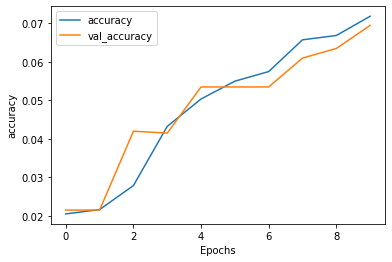

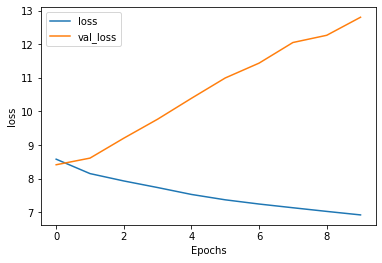

In [55]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Increasing the max length to 1000 and increasing the size of our neural network and epochs

In [57]:
max_length = 1000

# Preparing the data
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

# Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7274, activation='sigmoid')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 20
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 - 19s - loss: 8.6997 - accuracy: 0.0206 - val_loss: 8.4598 - val_accuracy: 0.0185
Epoch 2/20
8000/8000 - 18s - loss: 8.2696 - accuracy: 0.0213 - val_loss: 8.6249 - val_accuracy: 0.0185
Epoch 3/20
8000/8000 - 18s - loss: 8.0836 - accuracy: 0.0213 - val_loss: 9.1863 - val_accuracy: 0.0195
Epoch 4/20
8000/8000 - 18s - loss: 7.8865 - accuracy: 0.0288 - val_loss: 9.7084 - val_accuracy: 0.0225
Epoch 5/20
8000/8000 - 18s - loss: 7.6623 - accuracy: 0.0434 - val_loss: 9.9030 - val_accuracy: 0.0440
Epoch 6/20
8000/8000 - 18s - loss: 7.4757 - accuracy: 0.0521 - val_loss: 10.3641 - val_accuracy: 0.0535
Epoch 7/20
8000/8000 - 18s - loss: 7.3295 - accuracy: 0.0589 - val_loss: 11.2312 - val_accuracy: 0.0535
Epoch 8/20
8000/8000 - 18s - loss: 7.2073 - accuracy: 0.0600 - val_loss: 11.3585 - val_accuracy: 0.0670
Epoch 9/20
8000/8000 - 18s - loss: 7.0805 - accuracy: 0.0701 - val_loss: 11.6007 - val_accuracy: 0.0650
Epoch 10/20
8000/8000

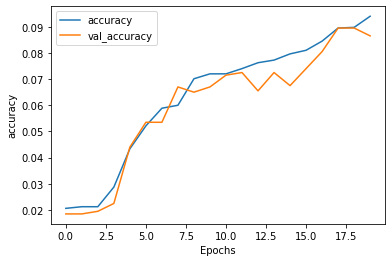

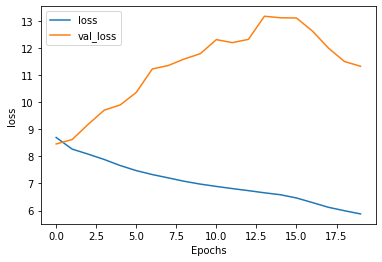

In [58]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [77]:
description[8]

'this administrative assistant position is responsible for performing a variety of clerical and administrative support functions in the areas of communications, data entry and retrieval, typing, filing, copying, and coordination of related administrative activities. job requirements attention to detail ability to work in a fast paced environment invoicing proficient in word, excel and outlook other administrative responsibilities as needed. qualifications high school diploma administrative assistant experience 1-2 years work experience working knowledge of all basic office machines (fax, copier, 10key, etc.) strong verbal and written communication skills strong work ethic.'

In [78]:
tmp_description = [description[8]]

tmp_token = tokenizer.texts_to_sequences(tmp_description)
tmp_pad = pad_sequences(tmp_token, maxlen=max_length, padding=padding_type, truncating=trunc_type)
tmp_pad = np.array(tmp_pad)

label_encoder.inverse_transform([np.argmax(model.predict(tmp_pad))])[0]

'Administrative Assistant'

# Training based on Skills (Requirements)

In [80]:
training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(requirements, title_encoded, test_size=0.2)

max_length = 1000

# Preparing the data
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

# Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7274, activation='sigmoid')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 20
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 - 19s - loss: 8.7584 - accuracy: 0.0194 - val_loss: 8.5363 - val_accuracy: 0.0170
Epoch 2/20
8000/8000 - 18s - loss: 8.2971 - accuracy: 0.0225 - val_loss: 8.5927 - val_accuracy: 0.0170
Epoch 3/20
8000/8000 - 18s - loss: 8.1263 - accuracy: 0.0217 - val_loss: 9.3974 - val_accuracy: 0.0170
Epoch 4/20
8000/8000 - 18s - loss: 7.9939 - accuracy: 0.0233 - val_loss: 9.3840 - val_accuracy: 0.0200
Epoch 5/20
8000/8000 - 18s - loss: 7.8826 - accuracy: 0.0241 - val_loss: 10.0732 - val_accuracy: 0.0200
Epoch 6/20
8000/8000 - 18s - loss: 7.7538 - accuracy: 0.0245 - val_loss: 10.6324 - val_accuracy: 0.0200
Epoch 7/20
8000/8000 - 18s - loss: 7.6543 - accuracy: 0.0262 - val_loss: 10.5823 - val_accuracy: 0.0200
Epoch 8/20
8000/8000 - 18s - loss: 7.5326 - accuracy: 0.0278 - val_loss: 11.1956 - val_accuracy: 0.0210
Epoch 9/20
8000/8000 - 18s - loss: 7.4183 - accuracy: 0.0280 - val_loss: 11.6024 - val_accuracy: 0.0215
Epoch 10/20
8000/800

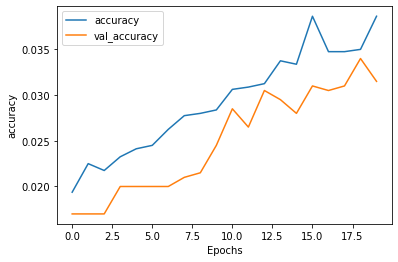

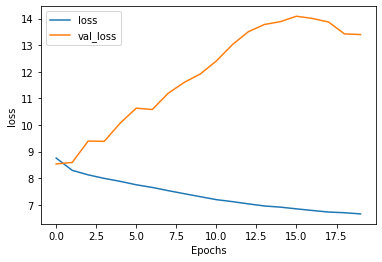

In [81]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [88]:
requirements[0]

'skill set network security tools webdefend web application firewall (waf), cisco routers, fortigate 3800 firewall series, palo alto 4000 firewall series, cisco asa 5xx firewall platform, cisco fwsm, sourcefire defense center, sourcefire ip sensor platform, bluecoat sg appliance, f5 bigip(reverse proxy). web application tools appdective, fortify sca, hp webinspect, and the like. network vulnerability tools tenable security center, mcafee foundstone scanner, cain and able, l0phtcrack - password cracker, nessus vulnerability scanner, nmap port scanner, and other scanning and vulnerability mapping tools. desirable skills cissp and/or related certifications education and years of experience bs computer science or related discipline minimum of 8 years in it security minimum 4 years in senior/lead position apply here'

In [89]:
tmp_description = [requirements[0]]

tmp_token = tokenizer.texts_to_sequences(tmp_description)
tmp_pad = pad_sequences(tmp_token, maxlen=max_length, padding=padding_type, truncating=trunc_type)
tmp_pad = np.array(tmp_pad)

label_encoder.inverse_transform([np.argmax(model.predict(tmp_pad))])[0]

'Systems Administrator'

# Problem with (skills)requirements

In [91]:
requirements[2]

'please refer to the job description to view the requirements for this job'

In [94]:
(requirements == 'please refer to the job description to view the requirements for this job').sum()

611

In [98]:
tmp = ['.', ' ', 'please refer to the job description to view the requirements for this job', 'see above']
count = 0
d = {}
for i in tmp:
    d[i] = (requirements == i).sum()
    count += d[i]
d, count

({'.': 538,
  ' ': 415,
  'please refer to the job description to view the requirements for this job': 611,
  'see above': 150},
 1714)

In [95]:
pd.DataFrame(requirements).value_counts()

please refer to the job description to view the requirements for this job                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

## Changing parmeter max_length to 5000 epochs to 100 and increasing the model size

In [99]:
training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(description, title_encoded, test_size=0.2)

max_length = 5000

# Preparing the data
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

# Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7274, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 100
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 - 34s - loss: 8.7309 - accuracy: 0.0210 - val_loss: 8.5050 - val_accuracy: 0.0190
Epoch 2/100
8000/8000 - 33s - loss: 8.2402 - accuracy: 0.0241 - val_loss: 8.7682 - val_accuracy: 0.0190
Epoch 3/100
8000/8000 - 34s - loss: 8.1068 - accuracy: 0.0304 - val_loss: 8.8984 - val_accuracy: 0.0395
Epoch 4/100
8000/8000 - 33s - loss: 7.9709 - accuracy: 0.0500 - val_loss: 9.4180 - val_accuracy: 0.0470
Epoch 5/100
8000/8000 - 34s - loss: 7.7992 - accuracy: 0.0547 - val_loss: 9.7464 - val_accuracy: 0.0510
Epoch 6/100
8000/8000 - 34s - loss: 7.6205 - accuracy: 0.0581 - val_loss: 10.5063 - val_accuracy: 0.0540
Epoch 7/100
8000/8000 - 34s - loss: 7.4624 - accuracy: 0.0649 - val_loss: 10.7906 - val_accuracy: 0.0585
Epoch 8/100
8000/8000 - 34s - loss: 7.3395 - accuracy: 0.0693 - val_loss: 11.4118 - val_accuracy: 0.0605
Epoch 9/100
8000/8000 - 34s - loss: 7.2045 - accuracy: 0.0705 - val_loss: 11.7426 - val_accuracy: 0.0610
Epoch 10/100

KeyboardInterrupt: 

## Deduction: we should keep around 3 layers with 128 or 512 neurons each

In [110]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7274, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 20
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 - 31s - loss: 8.7581 - accuracy: 0.0224 - val_loss: 8.5712 - val_accuracy: 0.0190
Epoch 2/20
8000/8000 - 29s - loss: 8.2186 - accuracy: 0.0225 - val_loss: 8.6600 - val_accuracy: 0.0190
Epoch 3/20
8000/8000 - 29s - loss: 8.0734 - accuracy: 0.0236 - val_loss: 9.0442 - val_accuracy: 0.0190
Epoch 4/20
8000/8000 - 30s - loss: 7.9649 - accuracy: 0.0370 - val_loss: 9.3237 - val_accuracy: 0.0375
Epoch 5/20
8000/8000 - 29s - loss: 7.8319 - accuracy: 0.0479 - val_loss: 9.8384 - val_accuracy: 0.0460
Epoch 6/20
8000/8000 - 29s - loss: 7.6842 - accuracy: 0.0549 - val_loss: 10.3847 - val_accuracy: 0.0505
Epoch 7/20
8000/8000 - 29s - loss: 7.5398 - accuracy: 0.0578 - val_loss: 11.2368 - val_accuracy: 0.0510
Epoch 8/20
8000/8000 - 30s - loss: 7.4179 - accuracy: 0.0589 - val_loss: 11.7135 - val_accuracy: 0.0475
Epoch 9/20
8000/8000 - 29s - loss: 7.3046 - accuracy: 0.0615 - val_loss: 12.2947 - val_accuracy: 0.0495
Epoch 10/20
8000/8000

In [111]:
import random
x = random.randint(0, 9999)
description[x], title[x]

for i in range(20):
    x = random.randint(0, 9999)
    tmp_description = [description[x]]
    tmp_token = tokenizer.texts_to_sequences(tmp_description)
    tmp_pad = pad_sequences(tmp_token, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    tmp_pad = np.array(tmp_pad)

    print(label_encoder.inverse_transform([np.argmax(model.predict(tmp_pad))])[0], ' ------------- ',title[x])

Retail Wireless Sales Consultant  -------------  Retail Wireless Sales Consultant
Maintenance Technician  -------------  TELEMARKETERS!DP7625797  Quick Hire Immediate Openings! Day and
Assistant Manager  -------------  AREA MANAGER
Maintenance Technician  -------------  Admin Processor, ADT Commercial Operations (Nashville, TN)
Administrative Assistant  -------------  Accounts Payable Clerk
Administrative Assistant  -------------  Inside Sales
Administrative Assistant  -------------  Recruiter
Mechanical Engineer  -------------  CNC HAAS setup/programmer
Mechanical Engineer  -------------  Regional Safety Manager - Dallas, TX
Administrative Assistant  -------------  Senior Accounting Analyst
Home Health Aides (HHAs) and CNAs  -------------  Macy's Hillsdale, San Mateo, CA: Retail Cosmetics Sales - Beauty
Mechanical Engineer  -------------  Staff Nurse – RN
Nurses (RN or LPN) for Home Care  -------------  Staff RN - 8900 Pulmonary Progressive Care Unit
Administrative Assistant  --------

In [17]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(training_padded, training_labels)

SVC(kernel='linear')

In [21]:
y_pred = svclassifier.predict(testing_padded)

In [22]:
y_pred, testing_labels

(array([5632, 3099, 1629, ..., 4782, 2304, 6855]),
 array([5632, 7047,  802, ..., 4782, 2304, 3252]))

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(testing_labels, y_pred)

0.135

In [29]:
svc = SVC(kernel = 'poly')
svc.fit(training_padded, training_labels)
y_pred = svc.predict(testing_padded)
accuracy_score(testing_labels, y_pred)

0.0705

In [30]:
svc = SVC(kernel = 'sigmoid')
svc.fit(training_padded, training_labels)
y_pred = svc.predict(testing_padded)
accuracy_score(testing_labels, y_pred)

0.091

In [31]:
svc = SVC(kernel = 'rbf')
svc.fit(training_padded, training_labels)
y_pred = svc.predict(testing_padded)
accuracy_score(testing_labels, y_pred)

0.1135

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(training_padded, training_labels)
y_pred = rfc.predict(testing_padded)
accuracy_score(testing_labels, y_pred)

## Training Model from 50k-60k

In [17]:
start_train, end_train = 50001, 60000

In [18]:
description = np.array(jobs['DescCleaned'])[start_train:end_train]
requirements = np.array(jobs['ReqCleaned'])[start_train:end_train]
title = np.array(jobs['Title'])[start_train:end_train]

target = title
label_encoder = LabelEncoder()
title_encoded = np.array(label_encoder.fit_transform(target))
title_encoded[:5], len(title_encoded)

training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(description, title_encoded, test_size=0.2)

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [25]:
# from sklearn.svm import SVC
# svc = SVC(kernel = 'linear')
# svc.fit(training_padded, training_labels)
# y_pred = svc.predict(testing_padded)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(testing_labels, y_pred)

0.2125

## Training data from 520k - 530k

In [22]:
start_train, end_train = 520001, 530000

In [23]:
description = np.array(jobs['DescCleaned'])[start_train:end_train]
requirements = np.array(jobs['ReqCleaned'])[start_train:end_train]
title = np.array(jobs['Title'])[start_train:end_train]

target = title
label_encoder = LabelEncoder()
title_encoded = np.array(label_encoder.fit_transform(target))
title_encoded[:5], len(title_encoded)

training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(description, title_encoded, test_size=0.2)

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [24]:
svc = SVC(kernel = 'linear')
svc.fit(training_padded, training_labels)
y_pred = svc.predict(testing_padded)
accuracy_score(testing_labels, y_pred)

0.114

## Working on top labels (62) with 500 or more samples

In [38]:
pd.DataFrame(jobs['Title'].value_counts())[:30]

,Title
Administrative Assistant,3258
Customer Service Representative,3088
Retail Wireless Sales Consultant,2893
Retail Sales Associate,2609
Sales / Customer Service – Part or Full time – Summer Work,2417
Staff Accountant,2340
Jani-King Franchise Business Opportunity,2183
Customer Service - Sales Representative - Part Time Work,1823
Project Manager,1720
Senior Accountant,1700


In [44]:
tmp = jobs['Title'].value_counts()
tmp = dict(tmp)
tmp

{'Administrative Assistant': 3258,
 'Customer Service Representative': 3088,
 'Retail Wireless Sales Consultant': 2893,
 'Retail Sales Associate': 2609,
 'Sales / Customer Service – Part or Full time – Summer Work': 2417,
 'Staff Accountant': 2340,
 'Jani-King Franchise Business Opportunity': 2183,
 'Customer Service - Sales Representative - Part Time Work': 1823,
 'Project Manager': 1720,
 'Senior Accountant': 1700,
 'Sales Management Trainee': 1584,
 'Inside Sales Representative': 1374,
 'Business Analyst': 1368,
 'Sales Representative': 1324,
 'Maintenance Technician': 1314,
 'Financial Analyst': 1230,
 'Receptionist': 1223,
 'Store Manager': 1217,
 'Executive Assistant': 1193,
 'Assistant Manager': 1111,
 'Accounting Clerk': 1023,
 'Java Developer': 1015,
 'Software Engineer': 992,
 'Accounts Payable Clerk': 953,
 'Restaurant Manager': 933,
 'Controller': 922,
 'Automotive Technician': 904,
 'Manufacturing Engineer': 883,
 'Physical Therapist': 850,
 'General Manager': 848,
 'Quali

In [50]:
min_samples_required = 500
samples_to_take = []
for k,v in tmp.items():
    if v >= min_samples_required:
        samples_to_take.append(k)
    else:
        break
len(samples_to_take)

62

In [51]:
jobs_cat1 = samples_to_take

In [52]:
from sklearn.utils import shuffle

df = jobs.loc[jobs['Title'].isin(jobs_cat1)]
df = shuffle(df, random_state=66)

In [58]:
print("Number of rows in the dataset with min_samples_for_each_title={} is {}".format(min_samples_required, len(df)))

Number of rows in the dataset with min_samples_for_each_title=500 is 67470


In [59]:
description = np.array(df['Description'])
requirements = np.array(df['Requirement'])
title = np.array(df['Title'])

target = title
label_encoder = LabelEncoder()
title_encoded = np.array(label_encoder.fit_transform(target))
title_encoded[:5], len(title_encoded)

training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(description, title_encoded, test_size=0.2)

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

### Hyperparameter tuning using 1000 random samples

In [80]:
X_train, X_test = training_padded[:5000], testing_padded[:5000]
y_train, y_test = training_labels[:5000], testing_labels[:5000]

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform

svm_param_grid = {'C': loguniform(1e0, 1e3),
                 'gamma': loguniform(1e-4, 1e-3),
                 'kernel': ['rbf'],
                 'class_weight':['balanced', None]}

random_forest_param_grid = {'bootstrap': [True, False],
                             'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                             'max_features': ['auto', 'sqrt'],
                             'min_samples_leaf': [1, 2, 4],
                             'min_samples_split': [2, 5, 10],
                             'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

knn_param_grid = { 'n_neighbors' : [5,7,9,11,13,15],
                   'weights' : ['uniform','distance'],
                   'metric' : ['minkowski','euclidean','manhattan']}

In [73]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_random = RandomizedSearchCV(estimator = knn, param_distributions = knn_param_grid, n_iter = 500,
                                cv = 5, verbose = 2, random_state = 42, n_jobs = -1)
knn_random.fit(X_train, y_train)
knn_random.best_score_, knn_random.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/abhishekshinde/Desktop/sample_project/env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:289: UserWarning: The total space of parameters 36 is smaller than n_iter=500. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


(0.3764, {'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan'})

In [74]:
from sklearn.svm import SVC

svm = SVC()
svm_random = RandomizedSearchCV(estimator = svm, param_distributions = svm_param_grid, n_iter = 200,
                                cv = 5, verbose=2, random_state=42, n_jobs=-1)
svm_random.fit(X_train, y_train)
svm_random.best_score_, svm_random.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


(0.3616,
 {'C': 3.3120277014659445,
  'class_weight': 'balanced',
  'gamma': 0.00018145961353490246,
  'kernel': 'rbf'})

In [75]:
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier()
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_forest_param_grid, n_iter = 100, 
#                                cv = 5, verbose=2, random_state=42, n_jobs = -1)
# rf_random.fit(X_train, y_train)
# rf_random.best_score_, rf_random.best_params_

In [81]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(samples_to_take), activation='sigmoid')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 20
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test), verbose=2)

Train on 5000 samples, validate on 5000 samples
Epoch 1/20
5000/5000 - 2s - loss: 3.9865 - accuracy: 0.0460 - val_loss: 3.6947 - val_accuracy: 0.0548
Epoch 2/20
5000/5000 - 1s - loss: 3.1801 - accuracy: 0.1036 - val_loss: 2.6854 - val_accuracy: 0.2618
Epoch 3/20
5000/5000 - 1s - loss: 2.3055 - accuracy: 0.3298 - val_loss: 2.1532 - val_accuracy: 0.3910
Epoch 4/20
5000/5000 - 2s - loss: 1.8350 - accuracy: 0.4538 - val_loss: 1.8458 - val_accuracy: 0.4470
Epoch 5/20
5000/5000 - 1s - loss: 1.4926 - accuracy: 0.5370 - val_loss: 1.6719 - val_accuracy: 0.4984
Epoch 6/20
5000/5000 - 2s - loss: 1.2499 - accuracy: 0.5988 - val_loss: 1.5338 - val_accuracy: 0.5256
Epoch 7/20
5000/5000 - 2s - loss: 1.0672 - accuracy: 0.6512 - val_loss: 1.4599 - val_accuracy: 0.5648
Epoch 8/20
5000/5000 - 1s - loss: 0.9240 - accuracy: 0.7060 - val_loss: 1.4135 - val_accuracy: 0.5812
Epoch 9/20
5000/5000 - 1s - loss: 0.7898 - accuracy: 0.7622 - val_loss: 1.3767 - val_accuracy: 0.6048
Epoch 10/20
5000/5000 - 1s - loss:

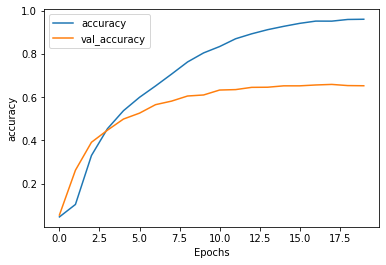

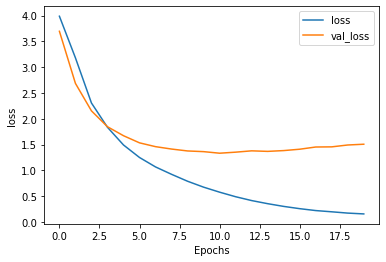

In [82]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Taking into account all the labels containing 500 or more samples for final dataset

### Function for getting accuracy of model

In [83]:
from sklearn.metrics import accuracy_score

def accuracy(model, X_test, y_test):
    return accuracy_score(y_test, model.predict(X_test))

In [84]:
X_train, X_test = training_padded, testing_padded
y_train, y_test = training_labels, testing_labels

### KNN

In [ ]:
knn = KNeighborsClassifier(weights= 'distance', n_neighbors= 5, metric= 'manhattan')
knn.fit(X_train, y_train)

In [86]:
accuracy(knn, X_test, y_test)

0.5331999407143916

### SVC

In [88]:
svc = SVC(C=3.3120277014659445, class_weight='balanced', gamma=0.00018145961353490246, kernel='rbf')
svc.fit(X_train, y_train)
accuracy(svc, X_test, y_test)

0.470801837853861

### ANN

In [91]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(samples_to_take), activation='sigmoid')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 10
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test), verbose=2)

Train on 53976 samples, validate on 13494 samples
Epoch 1/10
53976/53976 - 13s - loss: 1.9504 - accuracy: 0.4388 - val_loss: 1.0674 - val_accuracy: 0.6661
Epoch 2/10
53976/53976 - 12s - loss: 0.8460 - accuracy: 0.7408 - val_loss: 0.7750 - val_accuracy: 0.7638
Epoch 3/10
53976/53976 - 12s - loss: 0.6309 - accuracy: 0.8088 - val_loss: 0.6792 - val_accuracy: 0.8013
Epoch 4/10
53976/53976 - 12s - loss: 0.5243 - accuracy: 0.8410 - val_loss: 0.6340 - val_accuracy: 0.8180
Epoch 5/10
53976/53976 - 12s - loss: 0.4515 - accuracy: 0.8618 - val_loss: 0.6338 - val_accuracy: 0.8204
Epoch 6/10
53976/53976 - 12s - loss: 0.3998 - accuracy: 0.8750 - val_loss: 0.6217 - val_accuracy: 0.8263
Epoch 7/10
53976/53976 - 13s - loss: 0.3600 - accuracy: 0.8870 - val_loss: 0.6382 - val_accuracy: 0.8286
Epoch 8/10
53976/53976 - 12s - loss: 0.3285 - accuracy: 0.8964 - val_loss: 0.6318 - val_accuracy: 0.8347
Epoch 9/10
53976/53976 - 12s - loss: 0.3008 - accuracy: 0.9042 - val_loss: 0.6628 - val_accuracy: 0.8308
Epoch

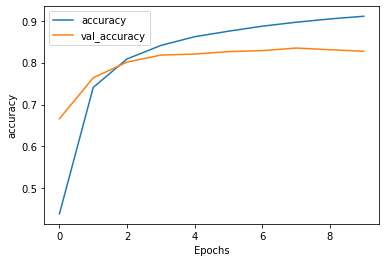

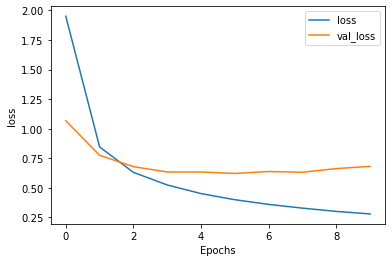

In [92]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Training on 101 labels (min_samples = 360)

In [99]:
min_samples_required = 360
samples_to_take = []
for k,v in tmp.items():
    if v >= min_samples_required:
        samples_to_take.append(k)
    else:
        break
len(samples_to_take)

101

In [104]:
min_samples_required = 360
samples_to_take = []
for k,v in tmp.items():
    if v >= min_samples_required:
        samples_to_take.append(k)
    else:
        break

df = jobs.loc[jobs['Title'].isin(samples_to_take)]
df = shuffle(df, random_state=66)

description = np.array(df['Description'])
requirements = np.array(df['Requirement'])
title = np.array(df['Title'])

target = title
label_encoder = LabelEncoder()
title_encoded = np.array(label_encoder.fit_transform(target))
title_encoded[:5], len(title_encoded)

training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(description, title_encoded, test_size=0.1)

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

X_train, X_test = training_padded, testing_padded
y_train, y_test = training_labels, testing_labels

In [105]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75632, 100), (8404, 100), (75632,), (8404,))

## ANN

In [106]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(samples_to_take), activation='sigmoid')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 10
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test), verbose=2)

Train on 75632 samples, validate on 8404 samples
Epoch 1/10
75632/75632 - 19s - loss: 2.6179 - accuracy: 0.2819 - val_loss: 1.6454 - val_accuracy: 0.5120
Epoch 2/10
75632/75632 - 18s - loss: 1.3638 - accuracy: 0.5868 - val_loss: 1.2631 - val_accuracy: 0.6224
Epoch 3/10
75632/75632 - 18s - loss: 1.0523 - accuracy: 0.6860 - val_loss: 1.0865 - val_accuracy: 0.6891
Epoch 4/10
75632/75632 - 18s - loss: 0.8655 - accuracy: 0.7426 - val_loss: 0.9798 - val_accuracy: 0.7207
Epoch 5/10
75632/75632 - 18s - loss: 0.7438 - accuracy: 0.7758 - val_loss: 0.9289 - val_accuracy: 0.7412
Epoch 6/10
75632/75632 - 18s - loss: 0.6629 - accuracy: 0.7991 - val_loss: 0.8752 - val_accuracy: 0.7574
Epoch 7/10
75632/75632 - 18s - loss: 0.6017 - accuracy: 0.8165 - val_loss: 0.8913 - val_accuracy: 0.7584
Epoch 8/10
75632/75632 - 18s - loss: 0.5541 - accuracy: 0.8290 - val_loss: 0.8648 - val_accuracy: 0.7658
Epoch 9/10
75632/75632 - 18s - loss: 0.5140 - accuracy: 0.8405 - val_loss: 0.8727 - val_accuracy: 0.7670
Epoch 

In [107]:
len(samples_to_take)

101

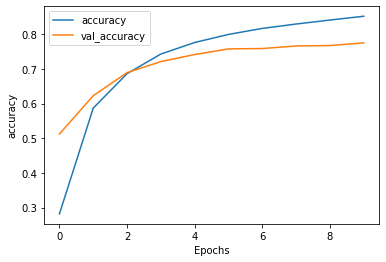

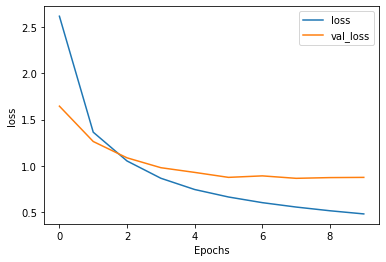

In [108]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")